In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
train_dir = '/content/drive/MyDrive/yogadataset/DATASET/TRAIN' #directory with training images
test_dir = '/content/drive/MyDrive/yogadataset/DATASET/TEST' #directory with testing images

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 32)
test_generator  = test_datagen.flow_from_directory(directory = test_dir,target_size = (224,224),color_mode = 'rgb',class_mode = 'categorical')

Found 1081 images belonging to 5 classes.
Found 480 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding = 'Same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 20
batch_size = 32

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
history = model.fit(train_generator, epochs = epochs,validation_data = test_generator)

Epoch 1/20
 2/34 [>.............................] - ETA: 51s - loss: 4.4390 - accuracy: 0.2500 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


34/34 [==============================] - 541s 16s/step - loss: 1.8721 - accuracy: 0.2183 - val_loss: 1.6006 - val_accuracy: 0.2396
Epoch 2/20
34/34 [==============================] - 36s 1s/step - loss: 1.5972 - accuracy: 0.2387 - val_loss: 1.5940 - val_accuracy: 0.2396
Epoch 3/20
34/34 [==============================] - 35s 1s/step - loss: 1.5910 - accuracy: 0.2525 - val_loss: 1.5942 - val_accuracy: 0.2396
Epoch 4/20
34/34 [==============================] - 36s 1s/step - loss: 1.5940 - accuracy: 0.2405 - val_loss: 1.5893 - val_accuracy: 0.2396
Epoch 5/20
34/34 [==============================] - 35s 1s/step - loss: 1.5874 - accuracy: 0.2322 - val_loss: 1.5837 - val_accuracy: 0.2500
Epoch 6/20
34/34 [==============================] - 36s 1s/step - loss: 1.5683 - accuracy: 0.2738 - val_loss: 1.5051 - val_accuracy: 0.4313
Epoch 7/20
34/34 [==============================] - 35s 1s/step - loss: 1.5113 - accuracy: 0.3302 - val_loss: 1.4309 - val_accuracy: 0.4021
Epoch 8/20
34/34 [===========

In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , test accuracy = {:.2f}".format(train_acc*100, test_acc*100))

15/15 [==============================] - 10s 650ms/step - loss: 0.3937 - accuracy: 0.8646
final train accuracy = 86.59 , test accuracy = 86.46


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

In [ ]:
model.save('/content/drive/MyDrive/trained model_yoga/YogaNet_model_1_1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


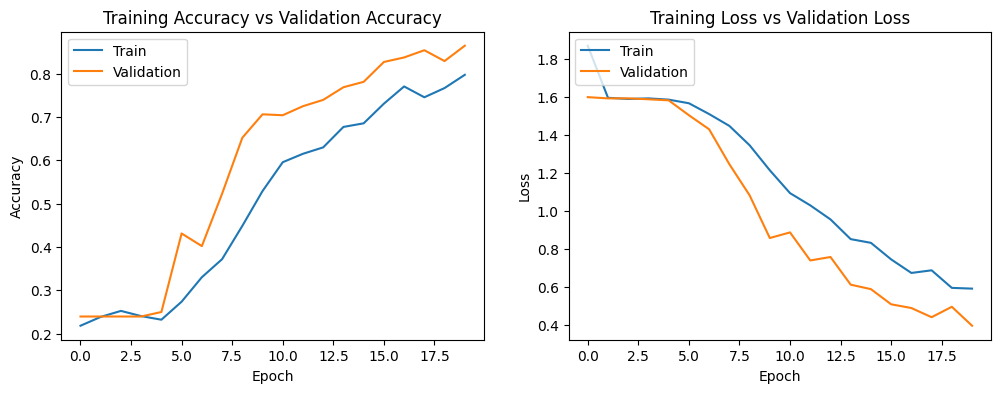

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , test accuracy = {:.2f}".format(train_acc*100, test_acc*100))

15/15 [==============================] - 9s 611ms/step - loss: 0.3937 - accuracy: 0.8646
final train accuracy = 86.86 , test accuracy = 86.46


1/1 [==============================] - 0s 88ms/step


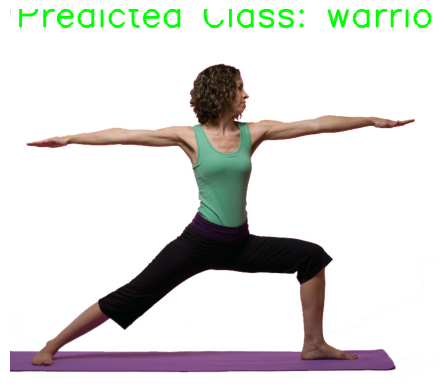

[[0. 0. 0. 0. 1.]]


In [ ]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
model = load_model('/content/drive/MyDrive/trained model_yoga/YogaNet_model_1_1.h5')
img = image.load_img('/content/drive/MyDrive/yogadataset/DATASET/TEST/warrior2/00000010.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
predicted_class = np.argmax(classes, axis=1)[0]
img_path = '/content/drive/MyDrive/yogadataset/DATASET/TEST/warrior2/00000010.jpg'
original_img = cv2.imread(img_path)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2
font_thickness = 3
font_color = (0, 255, 0)
class_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
predicted_class_name = class_names[predicted_class]
text = f'Predicted Class: {predicted_class_name}'
text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
text_position = (10, 30)
cv2.putText(original_img, text, text_position, font, font_scale, font_color, font_thickness)

# Display the image with predictions
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(classes)